In [ ]:
!git clone https://github.com/META-MINSU-LEE/Projects

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


# MEPFIL USP1 데이터를 불러옵니다.
df = pd.read_csv('./Projects/DATA/MEPFILUSP1.csv', encoding='cp949')

# 데이터 값을 살펴보겠습니다.
df


,Straight,EP,USP,Knot security,Diameter,Tie-down,Fast Avg,Fast Min,Moisture
0,13.03,8.35,7.41,6.69,0.490,1.08,5.45,4.85,20
1,NaN,8.09,NaN,6.22,0.491,NaN,5.94,5.71,46
2,NaN,8.13,NaN,6.91,0.482,NaN,5.85,5.59,55
3,NaN,8.39,NaN,6.81,0.487,NaN,5.83,5.67,61
4,NaN,8.04,NaN,6.45,0.484,NaN,6.02,5.91,NaN
...,...,...,...,...,...,...,...,...,...
4796,13.12,7.38,7.14,6.34,0.473,0.48,5.50,5.32,143
4797,NaN,7.42,NaN,6.58,0.481,NaN,5.15,4.91,132
4798,NaN,7.33,NaN,6.20,0.478,NaN,5.23,4.96,232
4799,NaN,7.26,NaN,6.34,0.474,NaN,5.49,5.41,64


In [ ]:
# 데이터가 어떤 유형으로 이루어져 있는지 알아봅니다.
df.dtypes

Straight         float64
EP               float64
USP              float64
Knot security    float64
Diameter         float64
Tie-down         float64
Fast Avg         float64
Fast Min          object
Moisture          object
dtype: object

In [ ]:
# 속성별로 결측치가 몇 개인지 확인합니다.
df.isnull().sum().sort_values(ascending=False).head(20)

Tie-down         3946
Straight         3935
USP              3935
Moisture         2275
Fast Min           11
Knot security       8
Diameter            7
Fast Avg            2
EP                  0
dtype: int64

In [ ]:
# 카테고리형 변수를 0과 1로 이루어진 변수로 바꾸어 줍니다.(12장 3절)
#df = pd.get_dummies(df)

# 결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다.
df = df.fillna(df.mean())

# 업데이트된 데이터 프레임을 출력해봅니다.
df

<ipython-input-5-659583e9f157>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,Straight,EP,USP,Knot security,Diameter,Tie-down,Fast Avg,Fast Min,Moisture
0,13.030,8.35,7.410000,6.69,0.490,1.080000,5.45,4.85,20
1,13.255,8.09,7.163788,6.22,0.491,1.061439,5.94,5.71,46
2,13.255,8.13,7.163788,6.91,0.482,1.061439,5.85,5.59,55
3,13.255,8.39,7.163788,6.81,0.487,1.061439,5.83,5.67,61
4,13.255,8.04,7.163788,6.45,0.484,1.061439,6.02,5.91,NaN
...,...,...,...,...,...,...,...,...,...
4796,13.120,7.38,7.140000,6.34,0.473,0.480000,5.50,5.32,143
4797,13.255,7.42,7.163788,6.58,0.481,1.061439,5.15,4.91,132
4798,13.255,7.33,7.163788,6.20,0.478,1.061439,5.23,4.96,232
4799,13.255,7.26,7.163788,6.34,0.474,1.061439,5.49,5.41,64


In [ ]:
# 데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()

# 집 값과 관련이 큰 것부터 순서대로 저장합니다.
df_corr_sort=df_corr.sort_values('Fast Avg', ascending=False)

# 집 값과 관련도가 가장 큰 10개의 속성들을 출력합니다.
df_corr_sort['Fast Avg'].head(7)

<ipython-input-9-0b3191f36bae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


Fast Avg         1.000000
EP               0.631324
Diameter         0.317086
USP              0.229142
Knot security    0.104187
Straight         0.059397
Tie-down        -0.127942
Name: Fast Avg, dtype: float64

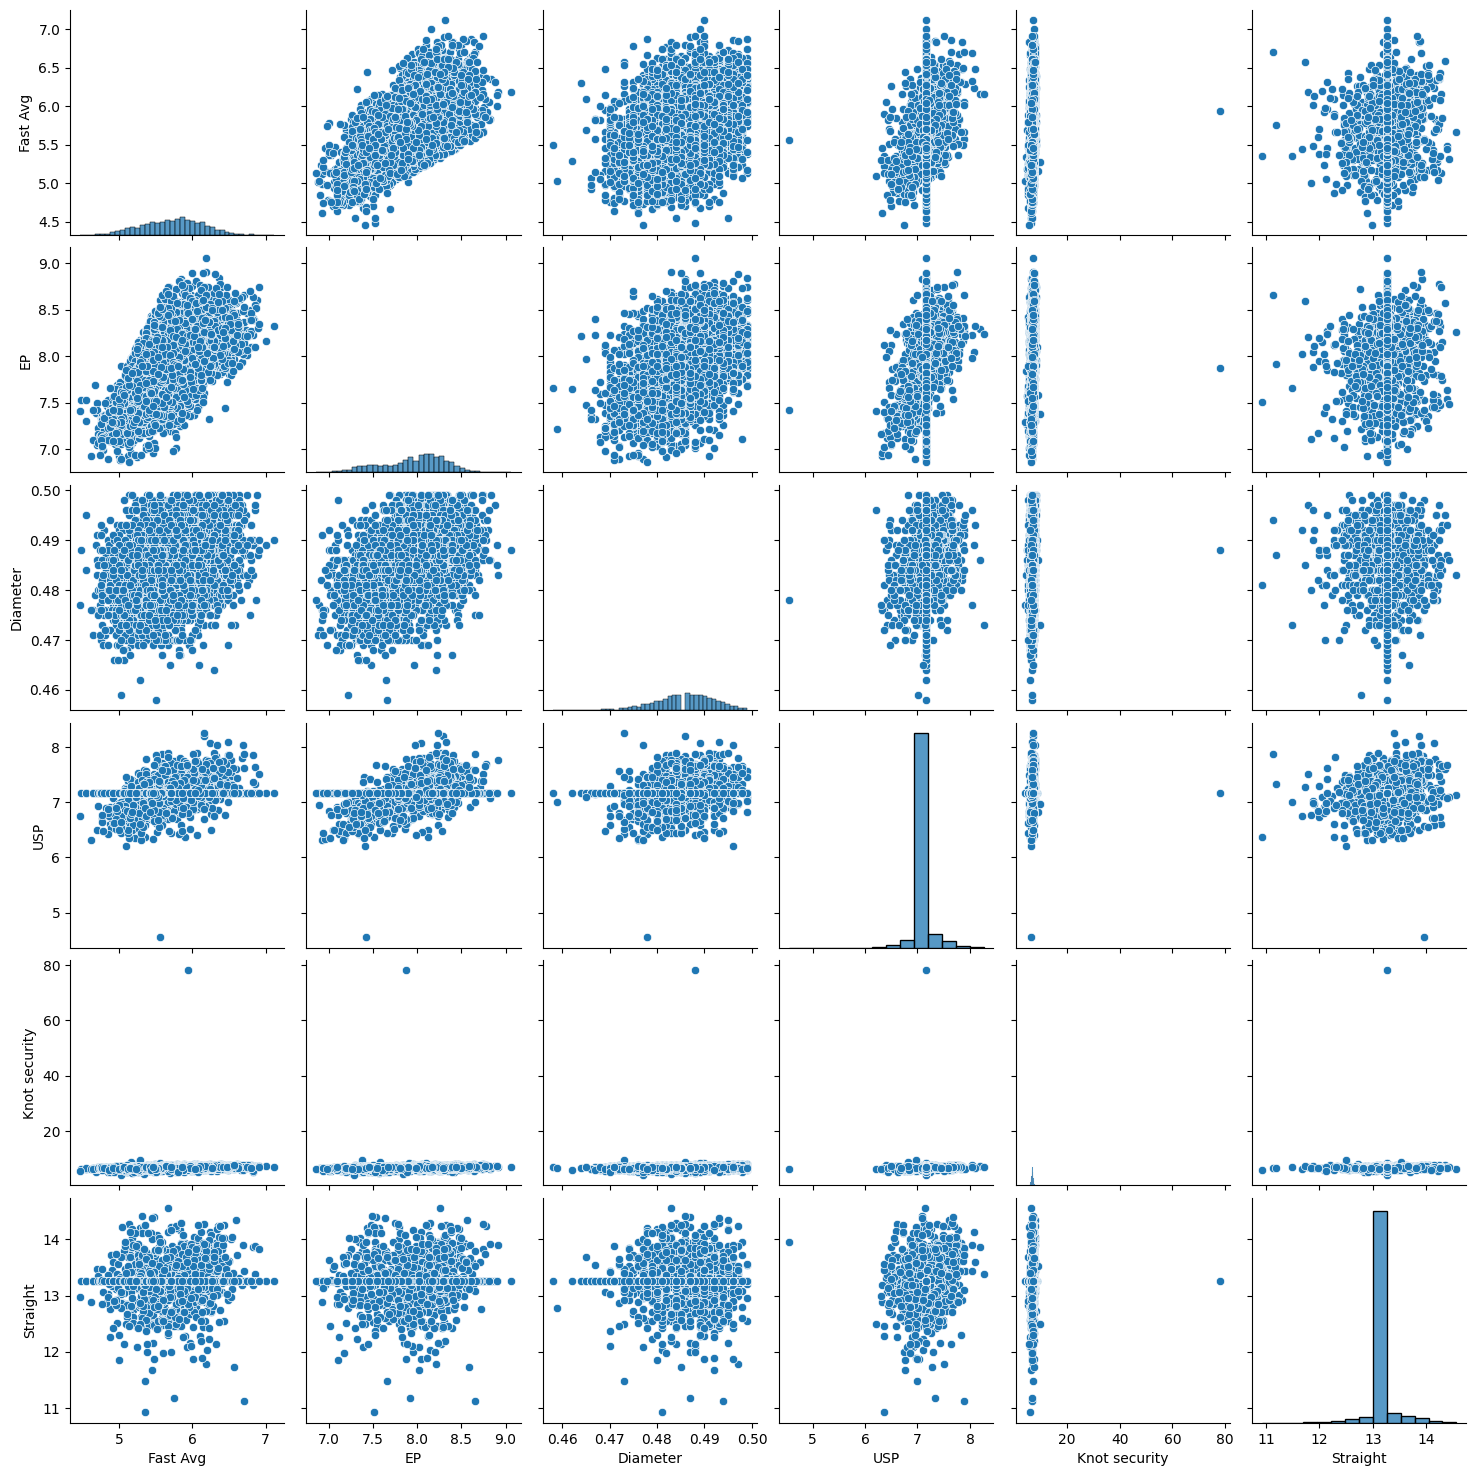

In [ ]:
cols=['Fast Avg', 'EP', 'Diameter', 'USP', 'Knot security', 'Straight']
sns.pairplot(df[cols])
plt.show();

In [ ]:
# 집 값을 제외한 나머지 열을 저장합니다.
cols_train=['EP', 'Diameter', 'USP', 'Knot security', 'Straight']
X_train_pre = df[cols_train]

# 집 값을 저장합니다.
y = df['Fast Avg'].values

In [ ]:
# 전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [ ]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

# 모델의 이름을 정합니다.
modelpath="./data/model/TEST.TEST1"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
88/90 [============================>.] - ETA: 0s - loss: 0.3029

90/90 [==============================] - 2s 15ms/step - loss: 0.2997 - val_loss: 0.1457
Epoch 2/2000
90/90 [==============================] - ETA: 0s - loss: 0.2120

90/90 [==============================] - 1s 11ms/step - loss: 0.2120 - val_loss: 0.1431
Epoch 3/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1910 - val_loss: 0.1473
Epoch 4/2000
59/90 [==================>...........] - ETA: 0s - loss: 0.1689

90/90 [==============================] - 1s 11ms/step - loss: 0.1625 - val_loss: 0.1396
Epoch 5/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1491 - val_loss: 0.1411
Epoch 6/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1400 - val_loss: 0.1431
Epoch 7/2000
87/90 [============================>.] - ETA: 0s - loss: 0.1401

90/90 [==============================] - 1s 11ms/step - loss: 0.1408 - val_loss: 0.1382
Epoch 8/2000
84/90 [===========================>..] - ETA: 0s - loss: 0.1370

90/90 [==============================] - 4s 42ms/step - loss: 0.1366 - val_loss: 0.1367
Epoch 9/2000
85/90 [===========================>..] - ETA: 0s - loss: 0.1349

90/90 [==============================] - 2s 20ms/step - loss: 0.1350 - val_loss: 0.1352
Epoch 10/2000
61/90 [===================>..........] - ETA: 0s - loss: 0.1306

90/90 [==============================] - 1s 11ms/step - loss: 0.1338 - val_loss: 0.1343
Epoch 11/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1331 - val_loss: 0.1436
Epoch 12/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1365 - val_loss: 0.1450
Epoch 13/2000
88/90 [============================>.] - ETA: 0s - loss: 0.1389

90/90 [==============================] - 1s 11ms/step - loss: 0.1391 - val_loss: 0.1330
Epoch 14/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1341 - val_loss: 0.1460
Epoch 15/2000
65/90 [====================>.........] - ETA: 0s - loss: 0.1299

90/90 [==============================] - 1s 16ms/step - loss: 0.1332 - val_loss: 0.1291
Epoch 16/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1277 - val_loss: 0.1436
Epoch 17/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1268 - val_loss: 0.1314
Epoch 18/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1329 - val_loss: 0.1394
Epoch 19/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1267 - val_loss: 0.1354
Epoch 20/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1252 - val_loss: 0.1305
Epoch 21/2000
86/90 [===========================>..] - ETA: 0s - loss: 0.1263

90/90 [==============================] - 1s 11ms/step - loss: 0.1267 - val_loss: 0.1290
Epoch 22/2000
89/90 [============================>.] - ETA: 0s - loss: 0.1303

90/90 [==============================] - 1s 11ms/step - loss: 0.1301 - val_loss: 0.1233
Epoch 23/2000
90/90 [==============================] - ETA: 0s - loss: 0.1203

90/90 [==============================] - 1s 11ms/step - loss: 0.1203 - val_loss: 0.1212
Epoch 24/2000
63/90 [====================>.........] - ETA: 0s - loss: 0.1268

90/90 [==============================] - 1s 11ms/step - loss: 0.1243 - val_loss: 0.1200
Epoch 25/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1211 - val_loss: 0.1303
Epoch 26/2000
85/90 [===========================>..] - ETA: 0s - loss: 0.1224

90/90 [==============================] - 1s 15ms/step - loss: 0.1220 - val_loss: 0.1193
Epoch 27/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1196 - val_loss: 0.1219
Epoch 28/2000
75/90 [========================>.....] - ETA: 0s - loss: 0.1184

90/90 [==============================] - 1s 15ms/step - loss: 0.1164 - val_loss: 0.1162
Epoch 29/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1200 - val_loss: 0.1301
Epoch 30/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1145 - val_loss: 0.1229
Epoch 31/2000
80/90 [=========================>....] - ETA: 0s - loss: 0.1126

90/90 [==============================] - 1s 14ms/step - loss: 0.1142 - val_loss: 0.1158
Epoch 32/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1141 - val_loss: 0.1174
Epoch 33/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1167 - val_loss: 0.1187
Epoch 34/2000
85/90 [===========================>..] - ETA: 0s - loss: 0.1179

90/90 [==============================] - 1s 11ms/step - loss: 0.1171 - val_loss: 0.1121
Epoch 35/2000
62/90 [===================>..........] - ETA: 0s - loss: 0.1230

90/90 [==============================] - 1s 14ms/step - loss: 0.1204 - val_loss: 0.1115
Epoch 36/2000
89/90 [============================>.] - ETA: 0s - loss: 0.1192

90/90 [==============================] - 1s 11ms/step - loss: 0.1190 - val_loss: 0.1107
Epoch 37/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1171 - val_loss: 0.1131
Epoch 38/2000
81/90 [==========================>...] - ETA: 0s - loss: 0.1145

90/90 [==============================] - 1s 12ms/step - loss: 0.1127 - val_loss: 0.1098
Epoch 39/2000
78/90 [=========================>....] - ETA: 0s - loss: 0.1136

90/90 [==============================] - 1s 11ms/step - loss: 0.1143 - val_loss: 0.1097
Epoch 40/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1120 - val_loss: 0.1388
Epoch 41/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1156 - val_loss: 0.1145
Epoch 42/2000
63/90 [====================>.........] - ETA: 0s - loss: 0.1130

90/90 [==============================] - 1s 11ms/step - loss: 0.1111 - val_loss: 0.1091
Epoch 43/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1115 - val_loss: 0.1258
Epoch 44/2000
86/90 [===========================>..] - ETA: 0s - loss: 0.1144

90/90 [==============================] - 1s 11ms/step - loss: 0.1135 - val_loss: 0.1077
Epoch 45/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1130 - val_loss: 0.1105
Epoch 46/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1077 - val_loss: 0.1084
Epoch 47/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1075 - val_loss: 0.1090
Epoch 48/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1127 - val_loss: 0.1304
Epoch 49/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1110 - val_loss: 0.1120
Epoch 50/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1038 - val_loss: 0.1126
Epoch 51/2000
85/90 [===========================>..] - ETA: 0s - loss: 0.1126

90/90 [==============================] - 1s 16ms/step - loss: 0.1120 - val_loss: 0.1062
Epoch 52/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1050 - val_loss: 0.1065
Epoch 53/2000
90/90 [==============================] - 0s 4ms/step - loss: 0.1086 - val_loss: 0.1107
Epoch 54/2000
90/90 [==============================] - 0s 4ms/step - loss: 0.1089 - val_loss: 0.1070
Epoch 55/2000
86/90 [===========================>..] - ETA: 0s - loss: 0.1121

90/90 [==============================] - 1s 15ms/step - loss: 0.1115 - val_loss: 0.1058
Epoch 56/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1110 - val_loss: 0.1059
Epoch 57/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1115 - val_loss: 0.1110
Epoch 58/2000
61/90 [===================>..........] - ETA: 0s - loss: 0.1095

90/90 [==============================] - 1s 11ms/step - loss: 0.1102 - val_loss: 0.1057
Epoch 59/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1058 - val_loss: 0.1066
Epoch 60/2000
83/90 [==========================>...] - ETA: 0s - loss: 0.1057

90/90 [==============================] - 1s 11ms/step - loss: 0.1045 - val_loss: 0.1055
Epoch 61/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1100 - val_loss: 0.1058
Epoch 62/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1071 - val_loss: 0.1112
Epoch 63/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1101 - val_loss: 0.1055
Epoch 64/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1117 - val_loss: 0.1171
Epoch 65/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1070 - val_loss: 0.1055
Epoch 66/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1039 - val_loss: 0.1207
Epoch 67/2000
90/90 [==============================] - ETA: 0s - loss: 0.1058

90/90 [==============================] - 1s 15ms/step - loss: 0.1058 - val_loss: 0.1054
Epoch 68/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1058 - val_loss: 0.1057
Epoch 69/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1040 - val_loss: 0.1135
Epoch 70/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1064 - val_loss: 0.1096
Epoch 71/2000
87/90 [============================>.] - ETA: 0s - loss: 0.1055

90/90 [==============================] - 1s 11ms/step - loss: 0.1049 - val_loss: 0.1053
Epoch 72/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1044 - val_loss: 0.1316
Epoch 73/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1071 - val_loss: 0.1057
Epoch 74/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1073 - val_loss: 0.1133
Epoch 75/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1131 - val_loss: 0.1469
Epoch 76/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1123 - val_loss: 0.1057
Epoch 77/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1082 - val_loss: 0.1157
Epoch 78/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1080 - val_loss: 0.1055
Epoch 79/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1053 - val_loss: 0.1054
Epoch 80/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1106 - val_loss: 0.1270
Epo

90/90 [==============================] - 1s 14ms/step - loss: 0.1034 - val_loss: 0.1048
Epoch 83/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1047 - val_loss: 0.1082
Epoch 84/2000
83/90 [==========================>...] - ETA: 0s - loss: 0.1032

90/90 [==============================] - 1s 15ms/step - loss: 0.1036 - val_loss: 0.1047
Epoch 85/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1097 - val_loss: 0.1084
Epoch 86/2000
90/90 [==============================] - 0s 4ms/step - loss: 0.1077 - val_loss: 0.1052
Epoch 87/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1068 - val_loss: 0.1278
Epoch 88/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1039 - val_loss: 0.1048
Epoch 89/2000
90/90 [==============================] - 0s 4ms/step - loss: 0.1041 - val_loss: 0.1132
Epoch 90/2000
79/90 [=========================>....] - ETA: 0s - loss: 0.1048

90/90 [==============================] - 1s 12ms/step - loss: 0.1037 - val_loss: 0.1045
Epoch 91/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1042 - val_loss: 0.1053
Epoch 92/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1053 - val_loss: 0.1046
Epoch 93/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1031 - val_loss: 0.1139
Epoch 94/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1080 - val_loss: 0.1049
Epoch 95/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1092 - val_loss: 0.1059
Epoch 96/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1069 - val_loss: 0.1107
Epoch 97/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1069 - val_loss: 0.1056
Epoch 98/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1036 - val_loss: 0.1262
Epoch 99/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1115 - val_loss: 0.1109
Epo

90/90 [==============================] - 1s 11ms/step - loss: 0.1040 - val_loss: 0.1042
Epoch 111/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1048 - val_loss: 0.1048
Epoch 112/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1055 - val_loss: 0.1092
Epoch 113/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1049 - val_loss: 0.1118
Epoch 114/2000
90/90 [==============================] - 0s 2ms/step - loss: 0.1042 - val_loss: 0.1048
Epoch 115/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1055 - val_loss: 0.1074
Epoch 116/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1050 - val_loss: 0.1055
Epoch 117/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1080 - val_loss: 0.1087
Epoch 118/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1091 - val_loss: 0.1105
Epoch 119/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1053 - val_loss: 0

90/90 [==============================] - 1s 14ms/step - loss: 0.1035 - val_loss: 0.1038
Epoch 125/2000
90/90 [==============================] - 0s 4ms/step - loss: 0.1064 - val_loss: 0.1056
Epoch 126/2000
90/90 [==============================] - 0s 4ms/step - loss: 0.1061 - val_loss: 0.1147
Epoch 127/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1072 - val_loss: 0.1060
Epoch 128/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1039 - val_loss: 0.1044
Epoch 129/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1040 - val_loss: 0.1047
Epoch 130/2000
90/90 [==============================] - 0s 4ms/step - loss: 0.1046 - val_loss: 0.1051
Epoch 131/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1059 - val_loss: 0.1048
Epoch 132/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1042 - val_loss: 0.1126
Epoch 133/2000
90/90 [==============================] - 0s 3ms/step - loss: 0.1037 - val_loss: 0

In [ ]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_FastAvg = []
pred_FastAvg = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제FastAvg: {:.2f}, 예상FastAvg: {:.2f}".format(real, prediction))
    real_FastAvg.append(real)
    pred_FastAvg.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

31/31 [==============================] - 0s 1ms/step
실제FastAvg: 5.40, 예상FastAvg: 5.96
실제FastAvg: 6.10, 예상FastAvg: 5.91
실제FastAvg: 5.39, 예상FastAvg: 5.69
실제FastAvg: 5.56, 예상FastAvg: 5.34
실제FastAvg: 5.07, 예상FastAvg: 5.20
실제FastAvg: 6.08, 예상FastAvg: 5.89
실제FastAvg: 5.49, 예상FastAvg: 5.72
실제FastAvg: 5.86, 예상FastAvg: 5.37
실제FastAvg: 5.35, 예상FastAvg: 5.37
실제FastAvg: 6.50, 예상FastAvg: 5.86
실제FastAvg: 5.61, 예상FastAvg: 6.00
실제FastAvg: 6.14, 예상FastAvg: 6.10
실제FastAvg: 4.84, 예상FastAvg: 5.48
실제FastAvg: 5.64, 예상FastAvg: 5.53
실제FastAvg: 5.82, 예상FastAvg: 5.76
실제FastAvg: 5.94, 예상FastAvg: 5.77
실제FastAvg: 6.05, 예상FastAvg: 5.99
실제FastAvg: 5.86, 예상FastAvg: 6.01
실제FastAvg: 5.04, 예상FastAvg: 5.55
실제FastAvg: 5.28, 예상FastAvg: 5.88
실제FastAvg: 5.87, 예상FastAvg: 5.67
실제FastAvg: 5.91, 예상FastAvg: 5.91
실제FastAvg: 5.46, 예상FastAvg: 5.96
실제FastAvg: 6.12, 예상FastAvg: 5.89
실제FastAvg: 6.07, 예상FastAvg: 6.00


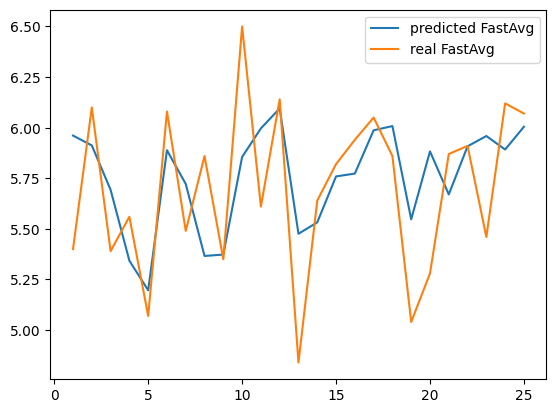

In [ ]:
# 그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_FastAvg, label='predicted FastAvg')
plt.plot(X_num, real_FastAvg, label='real FastAvg')
plt.legend()
plt.show()